The goal of this (first) notebook is to overfit network. According to this cheat sheet https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-deep-learning-tips-and-tricks#good-practices
it is a good practice to overfit a model on a small batch to check if it is capable of learning at all.

In [1]:
import numpy as np
import tensorflow as tf
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

%matplotlib notebook

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)



In [2]:
data_length = 401
noise = np.random.normal(0.01, 0.3, data_length)
x = np.linspace(-2*np.pi, 2*np.pi, data_length) 
y = np.sin(x)#+ noise
df = pd.DataFrame(data={'X':x, 'y':y})


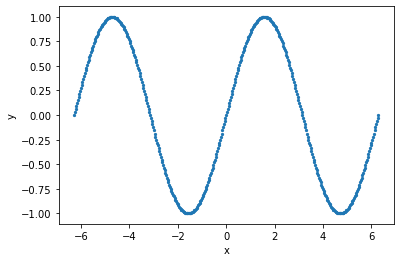

In [3]:
plt.scatter(df["X"], df["y"],s=5)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('tight')
plt.show()

In [4]:
df.head()


,X,y
0,-6.283185,2.449294e-16
1,-6.251769,3.141076e-02
2,-6.220353,6.279052e-02
3,-6.188938,9.410831e-02
4,-6.157522,1.253332e-01


In [5]:
df.describe()

,X,y
count,4.010000e+02,4.010000e+02
mean,1.630173e-15,-6.439325e-17
std,3.641199e+00,7.071068e-01
min,-6.283185e+00,-1.000000e+00
25%,-3.141593e+00,-7.071068e-01
50%,8.881784e-16,1.224647e-16
75%,3.141593e+00,7.071068e-01
max,6.283185e+00,1.000000e+00


In [6]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(df["X"].values.reshape(-1,1))
y_train = scaler.fit_transform(df["y"].values.reshape(-1,1))
n_inputs = X_train.shape[1]
print(X_train[:5])
print(y_train[:5])
print(X_train.shape)
print(y_train.shape)
print(n_inputs)


[[0.    ]
 [0.0025]
 [0.005 ]
 [0.0075]
 [0.01  ]]
[[0.5       ]
 [0.51570538]
 [0.53139526]
 [0.54705416]
 [0.56266662]]
(401, 1)
(401, 1)
1


In [7]:
tf.reset_default_graph() 

with tf.name_scope("dnn"):
    X = tf.placeholder(tf.float32, shape = (None, n_inputs), name="X")
    y = tf.placeholder(tf.float32, shape=(None,1), name = "y")
    hidden1 = tf.keras.layers.Dense(10,name="hidden1")(X)
    hidden2 = tf.keras.layers.Dense(150, name="hidden2",activation=tf.nn.leaky_relu )(hidden1)
    hidden3 = tf.keras.layers.Dense(50, name="hidden3" )(hidden2)
    hidden4 = tf.keras.layers.Dense(150, name="hidden4", activation=tf.nn.leaky_relu )(hidden3)
    y_pred =  tf.keras.layers.Dense(1, name="output")(hidden4)
    
with tf.name_scope('MSE'):
    error = y_pred - y
    mse = tf.reduce_mean(tf.square(error), name="mse")
    
with tf.name_scope('train'):
    optimiser = tf.train.AdamOptimizer(0.01)
    training_op = optimiser.minimize(mse)

init = tf.global_variables_initializer()

n_epochs = 30000

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        sess.run(training_op, feed_dict={X: X_train, y: y_train})
        if epoch % 10000 == 0:
            mse_val = mse.eval(feed_dict={X: X_train, y: y_train})
            print(mse_val)
    predictions = y_pred.eval(feed_dict={X: X_train, y: y_train})
    



W0729 21:18:49.504703  2956 deprecation.py:506] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


0.2900585
0.0135698635
0.00014227672


In [8]:
print("xs:", X_train[:5])
print("original", y_train[:5])
print("predictions" ,predictions[:5])

print("xs:", X_train[-5:])
print("original", y_train[-5:])
print("predictions" ,predictions[-5:])

xs: [[0.    ]
 [0.0025]
 [0.005 ]
 [0.0075]
 [0.01  ]]
original [[0.5       ]
 [0.51570538]
 [0.53139526]
 [0.54705416]
 [0.56266662]]
predictions [[0.70850086]
 [0.7129803 ]
 [0.7174752 ]
 [0.7219701 ]
 [0.7264637 ]]
xs: [[0.99  ]
 [0.9925]
 [0.995 ]
 [0.9975]
 [1.    ]]
original [[0.43733338]
 [0.45294584]
 [0.46860474]
 [0.48429462]
 [0.5       ]]
predictions [[0.43290588]
 [0.4439709 ]
 [0.4518251 ]
 [0.4596562 ]
 [0.46826503]]


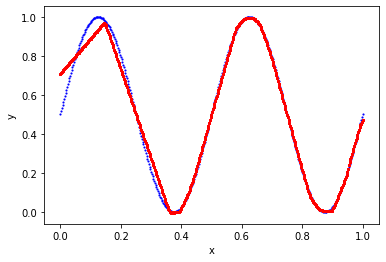

In [9]:
plt.scatter(X_train, y_train,s=5, color='b',marker='.')
plt.scatter(X_train, predictions,s=5, color='r',marker = ',')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('tight')
plt.show()

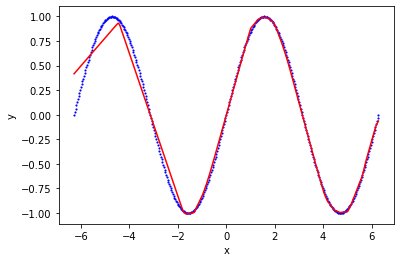

In [10]:
y_new_inverse = scaler.inverse_transform(predictions)

plt.scatter(df["X"], df["y"],s=5, color='b',marker='.')
#plt.scatter(df["X"], y_new_inverse,s=5, color='r',marker = ',')
plt.plot(df["X"], y_new_inverse,color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('tight')
plt.show()

Looks overfited enough to me